<a href="https://colab.research.google.com/github/pysaurav/ML-Track/blob/master/KNN_from_Scratch_and_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

KNN is an classification algorithm that classifies a data point based on how it's neighbours are classified.

‘k’ in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process

‘k’ in KNN algorithm is based on feature similarity choosing the right value of K is a process called parameter tuning and is important for better accuracy. Finding the value of k is not easy.

#Importing Requirements

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from scipy.spatial import distance
sns.set()
%matplotlib inline

In [0]:
df = pd.read_csv("/content/sample_data/diabetes.csv")

#Data Exploration

In [51]:
df.head()
len(df)

768

In [52]:
'''observing central tendancy and spread of data'''
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Visualizing the data and its correlations

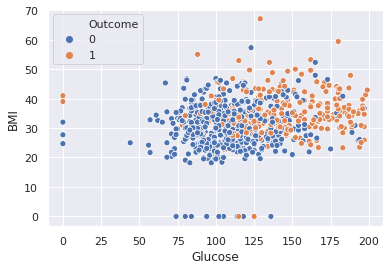

In [53]:
ax = sns.scatterplot(x="Glucose", y="BMI", hue="Outcome",
                     data=df)

Here we can see that with increase in glucose level the diabetic the probability of being diabetic increases.

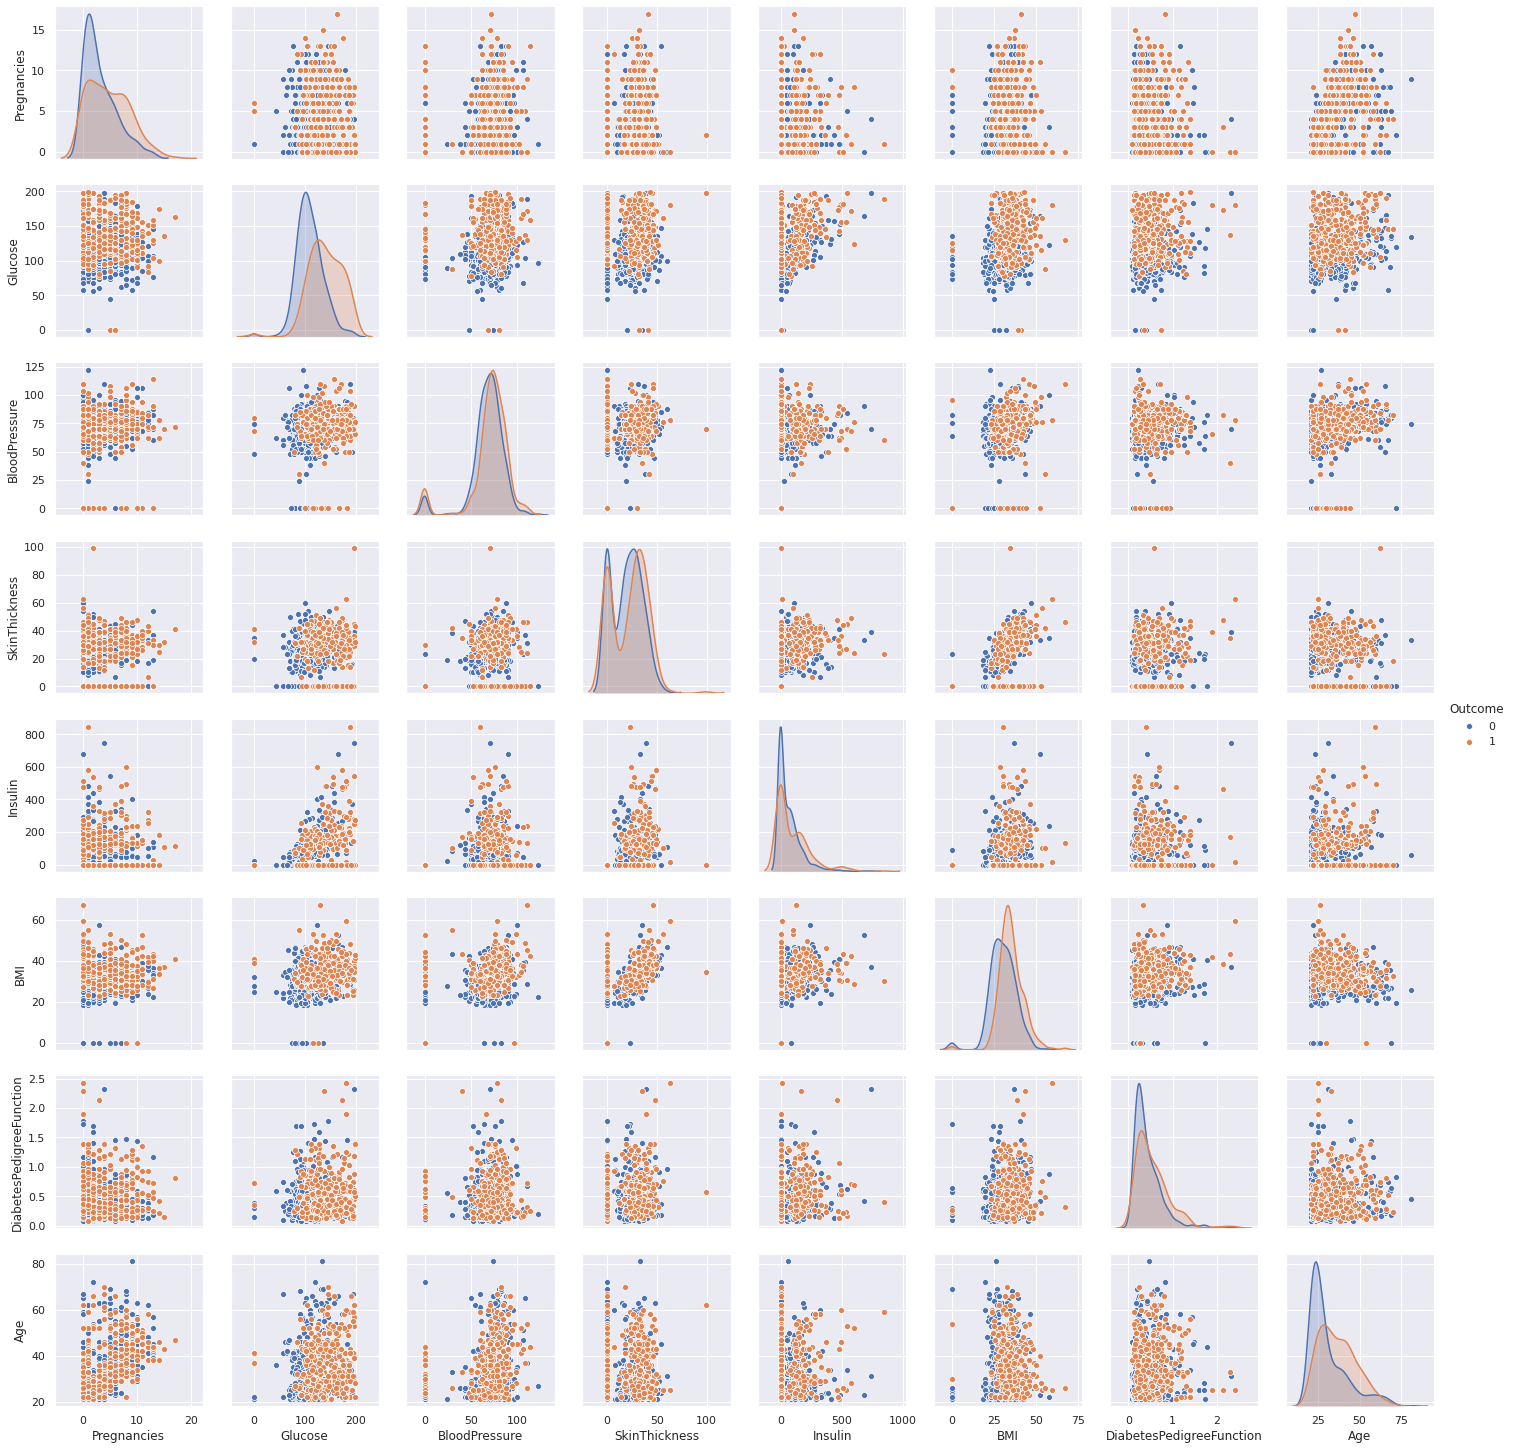

In [78]:
sns.pairplot(df.select_dtypes(include=np.number),hue ="Outcome")
plt.show()

In [79]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


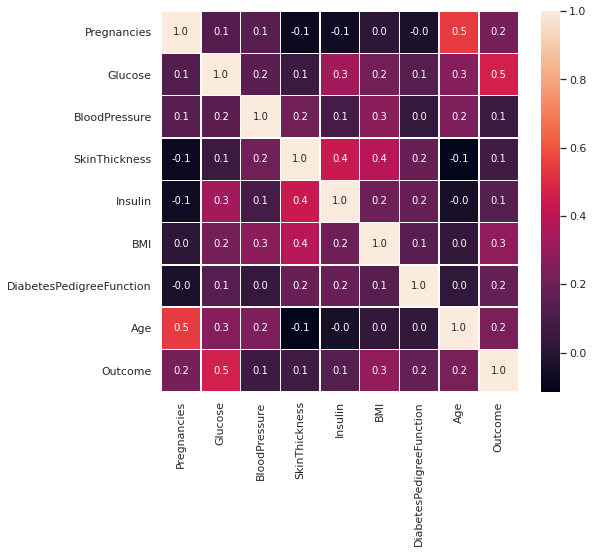

In [56]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df[df.columns.to_list()].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

We observe from the heatmap that glucose level largely affects our target value more than others we can be also inferred from above correlation table as the value is 0.4 , fairly significant.

#Data Preprocessing

In [0]:
'''Splitting the feature and target as X and y'''
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [0]:
'''Further splitting the data into train and test sets using sklearn'''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

Now we will iterate through the value of 'k' to find out which gives the better result on the test set.

In [59]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)    
    test_accuracy[i] = knn.score(X_test, y_test)
print("The test accoracy for the value of k are:\n",[i for i in zip(neighbors,test_accuracy)])

The test accoracy for the value of k are:
 [(1, 0.671875), (2, 0.71875), (3, 0.6979166666666666), (4, 0.7291666666666666), (5, 0.6927083333333334), (6, 0.6979166666666666), (7, 0.7135416666666666), (8, 0.7239583333333334), (9, 0.7083333333333334)]


#Evaluating the model

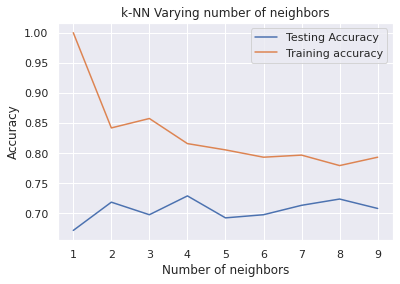

In [60]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see the we have the best model at k=7 for this dataset. Creating a model with k=7

In [61]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [62]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[103,  22],
       [ 33,  34]])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.82      0.79       125
           1       0.61      0.51      0.55        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.71      0.71       192



#KNN from Scratch!!!

Now lets create the KNN classifier from scratch without using the scikit Library. Lets write the required functions

In [0]:
def nearest_neighbors(train, test_row, num_neighbors, distance_measure):
    distances = []
    for train_row in train:
        dist = distance_measure(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

def predict_classification(train, test_row, num_neighbors, distance_measure):
    neighbors = nearest_neighbors(train, test_row, num_neighbors, distance_measure)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def k_nearest_neighbors(train, test, num_neighbors, distance_measure):
    predictions = []
    for row in test:
        output = predict_classification(train, row, num_neighbors, distance_measure)
        predictions.append(output)
    return(predictions)

So here when we call the k_nearest_neighbors() method. For every test data point it's distance with all the train data points is calculated. Depending on the value of 'k' it takes the nearest k-points and finds which target value is more among its neighbors and classifies the test point as that.

Lets split the data by ourselves and convert to numpy array for computation. Here we splitted the dataframe into train(576 or .75% of the data) and test set(remaining .25% of the data) 

In [0]:
train_data =df[:576] 
test_data = df[576:]
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

As the distance measure can be of three types:
1.   Euclidean
2.   Manhattan
3.   Minkowski

#Using Euclidean/L2 distance measure

In [71]:
def L2_norm_distance(row1, row2):
  return distance.euclidean(row1[:2], row2[:2])

num_neighbors = 7
scores = []
predicted = k_nearest_neighbors(train_data, test_data, num_neighbors, L2_norm_distance)

actual = [row[-1] for row in test_data]
accuracy = accuracy_metric(actual, predicted)
scores.append(accuracy)
print('Mean Accuracy using L2 Norm: %.2f%%' % (sum(scores)/float(len(scores))))


Mean Accuracy using L2 Norm: 72.40%


#Using Cityblock/L1 distance measure

In [75]:
def L1_norm_distance(row1, row2):
    return distance.cityblock(row1[:2], row2[:2])

num_neighbors = 7
scores = []
predicted = k_nearest_neighbors(train_data, test_data, num_neighbors, L1_norm_distance)

actual = [row[-1] for row in test_data]
accuracy = accuracy_metric(actual, predicted)
scores.append(accuracy)
print('Mean Accuracy using L1 Norm: %.2f%%' % (sum(scores)/float(len(scores))))

Mean Accuracy using L1 Norm: 68.75%


#Using Chebyshev/Linfinite distance measure

In [77]:
def L_infinite_norm_distance(row1, row2):
    return distance.chebyshev(row1[:2], row2[:2])

num_neighbors = 3
scores = []
predicted = k_nearest_neighbors(train_data, test_data, num_neighbors, L_infinite_norm_distance)

actual = [row[-1] for row in test_data]
accuracy = accuracy_metric(actual, predicted)
scores.append(accuracy)
print('Mean Accuracy using L-infinite Norm: %.2f%%' % (sum(scores)/float(len(scores))))

Mean Accuracy using L-infinite Norm: 72.40%


So here we can observe that the accuracy of model from scikit learn and the model we created from scratch gives fairly same result.

#Pros and Cons

Pros of KNN
* Simple to understand and interpret.
* Flexible to feature/distance choices
* Naturally handles multi-class cases
* Can do well in practice with enough representative data

Cons of KNN
* Need to determine the value of parameter K (number of nearest neighbors)
* Computation cost is quite high because we need to compute the distance of each query instance to all training samples.
* High memory storage is required compared to other supervised learning algorithms
* Must know we have a meaningful distance function.
